<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [ ]:
import tensorflow as tf

In [ ]:
rank_0=tf.constant(99.99)
print(rank_0)

tf.Tensor(99.99, shape=(), dtype=float32)


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [ ]:
rank_1=tf.constant([9,8,7,6,5])
print(rank_1)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [ ]:
tf.add(rank_1,7)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([16, 15, 14, 13, 12], dtype=int32)>

In [ ]:
tf.broadcast_to(rank_1+7,[5])

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([16, 15, 14, 13, 12], dtype=int32)>

### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [ ]:
rank_2=tf.constant([[1,2,3],[4,5,6]])
rank_2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

### Change the shape of the above created tensor to shape (3,2)

In [ ]:
tf.reshape(rank_2,[3,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [ ]:
tf.reshape(rank_2,[-1,2])

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

### Check the dtype, number of axes and the shape of tensor

In [ ]:
rank_2.dtype

tf.int32

In [ ]:
rank_2.shape

TensorShape([2, 3])

In [ ]:
rank_2.ndim

2

- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

## Question 1

### Load the data
- Load the data, check the shape of data

In [ ]:
data=pd.read_csv("/content/sample_data/car_data-1.csv")
data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [ ]:
data.shape

(8128, 11)

## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [ ]:
def map_num(num):
  try:
    if type(num) == str:
      return float(num.split()[0])
    else:
      return num
  except:
    return np.nan

In [ ]:
data[["mileage","engine","max_power"]]=data[["mileage","engine","max_power"]].applymap(map_num)

In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
ohe=OneHotEncoder()

In [ ]:
data["owner"]=le.fit_transform(data["owner"])

In [ ]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


In [ ]:
cat_columns=['fuel','seller_type','transmission']
for category in cat_columns:
  z=pd.get_dummies(data[category])
  data=pd.concat([data,z],axis=1)
  data.drop(columns=[category],inplace=True)



In [ ]:
data.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,CNG,Diesel,LPG,Petrol,Dealer,Individual,Trustmark Dealer,Automatic,Manual
0,2014,450000,145500,0,23.40,1248.0,74.00,5.0,0,1,0,0,0,1,0,0,1
1,2014,370000,120000,2,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0,1
2,2006,158000,140000,4,17.70,1497.0,78.00,5.0,0,0,0,1,0,1,0,0,1
3,2010,225000,127000,0,23.00,1396.0,90.00,5.0,0,1,0,0,0,1,0,0,1
4,2007,130000,120000,0,16.10,1298.0,88.20,5.0,0,0,0,1,0,1,0,0,1


In [ ]:
data.isna().sum()

year                  0
selling_price         0
km_driven             0
owner                 0
mileage             221
engine              221
max_power           216
seats               221
CNG                   0
Diesel                0
LPG                   0
Petrol                0
Dealer                0
Individual            0
Trustmark Dealer      0
Automatic             0
Manual                0
dtype: int64

In [ ]:
data=data.dropna(axis=0)

In [ ]:
data.shape

(7906, 17)

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop("selling_price",axis=1)
y=data["selling_price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,Dropout,Input,LeakyReLU
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
model=Sequential()

model.add(tf.keras.Input(shape=16))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(1,activation="linear"))

### Check model summary and visualize the model

In [ ]:
model.summary(  )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

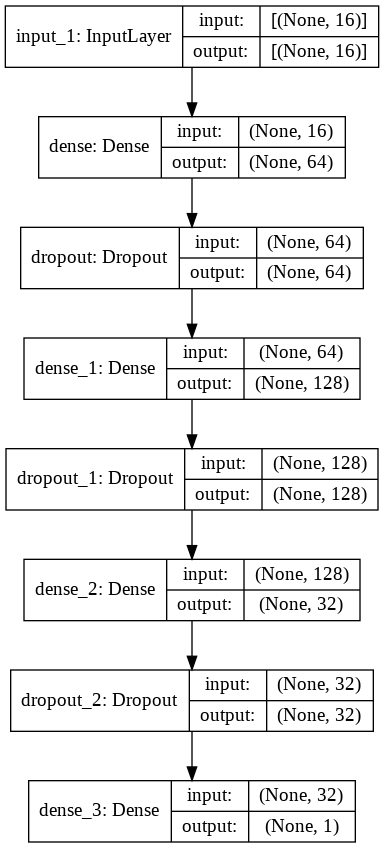

In [ ]:
plot_model(model,show_layer_names=True,show_shapes=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
from keras import backend as K
def r_2_score(y_true, y_pred):
    SS_resid =  K.sum(K.square( y_true-y_pred )) 
    SS_total = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_resid/(SS_total + K.epsilon()))


In [ ]:
from sklearn.metrics import r2_score
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=[r_2_score])

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,mode='min')
history=model.fit(X_train,y_train,epochs=200,batch_size=32,callbacks=[callback],verbose=1,validation_data=(X_test,y_test))

Epoch 1/200
186/186 [==============================] - 1s 3ms/step - loss: 647914.6207 - r_2_score: -1.2122 - val_loss: 647976.8125 - val_r_2_score: -1.0112
Epoch 2/200
186/186 [==============================] - 0s 2ms/step - loss: 633009.3783 - r_2_score: -1.0432 - val_loss: 524059.3438 - val_r_2_score: -0.5671
Epoch 3/200
186/186 [==============================] - 0s 2ms/step - loss: 448716.4611 - r_2_score: -0.4002 - val_loss: 305459.4062 - val_r_2_score: 0.3026
Epoch 4/200
186/186 [==============================] - 0s 2ms/step - loss: 280074.0786 - r_2_score: 0.3887 - val_loss: 246370.5312 - val_r_2_score: 0.5530
Epoch 5/200
186/186 [==============================] - 0s 2ms/step - loss: 234687.5339 - r_2_score: 0.5434 - val_loss: 223128.3906 - val_r_2_score: 0.6232
Epoch 6/200
186/186 [==============================] - 0s 2ms/step - loss: 222405.5563 - r_2_score: 0.6111 - val_loss: 210084.1875 - val_r_2_score: 0.6584
Epoch 7/200
186/186 [==============================] - 0s 2ms/ste

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [ ]:
model.evaluate(X_test,y_test,batch_size=64)

31/31 [==============================] - 0s 958us/step - loss: 123419.0859 - r_2_score: 0.9067


[123419.0859375, 0.9067304134368896]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [ ]:
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9109843236712468

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

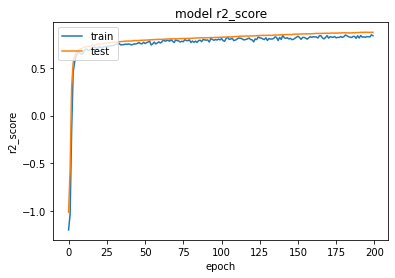

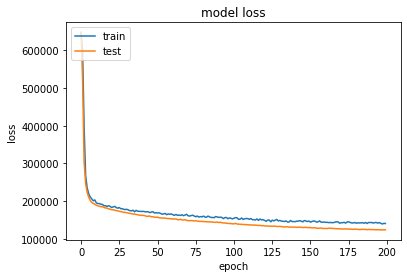

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
tf.keras.backend.clear_session()
model2=Sequential()

In [ ]:
model2.add(tf.keras.Input(shape=16))
#model2.add(tf.keras.layers.BatchNormalization(input_shape=(16,)))

model2.add(Dense(64,activation=tf.keras.layers.LeakyReLU()))
model2.add(Dropout(0.20))
#model2.add(tf.keras.layers.BatchNormalization())

model2.add(Dense(128,activation=tf.keras.layers.LeakyReLU()))
model2.add(Dropout(0.20))
#model2.add(tf.keras.layers.BatchNormalization())

model2.add(Dense(32,activation=tf.keras.layers.LeakyReLU()))
model2.add(Dropout(0.15))
#model2.add(tf.keras.layers.BatchNormalization())

model2.add(Dense(1,activation="linear"))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

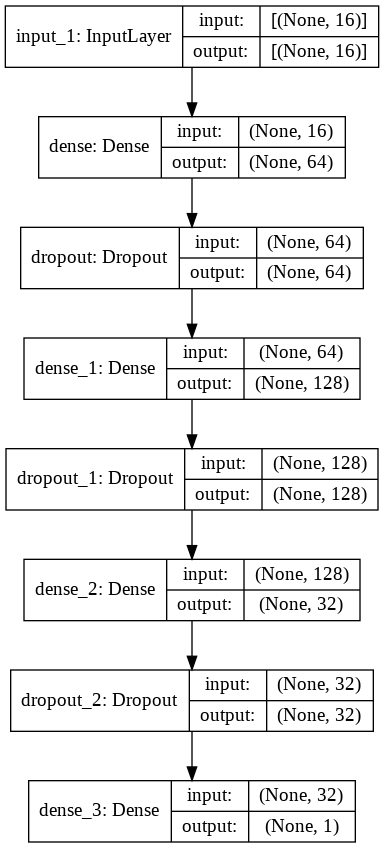

In [ ]:
plot_model(model2,show_shapes=True)

### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [ ]:
model2.compile(optimizer='adam',loss='mean_absolute_error',metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


In [ ]:
check_point = tf.keras.callbacks.ModelCheckpoint('./checkpoint/model2.h5', monitor='val_loss',save_best_only=True,save_freq='epoch')
callback2=tf.keras.callbacks.EarlyStopping(mode="min",monitor="val_loss",patience=10,restore_best_weights=True)
history2=model2.fit(X_train,y_train,batch_size=16,validation_data=(X_test,y_test),epochs=200,callbacks=[callback2,check_point],verbose=1)

Epoch 1/200
371/371 [==============================] - 1s 2ms/step - loss: 661278.4908 - r_2_score: -1.8711 - val_loss: 566458.6250 - val_r_2_score: -1.2737
Epoch 2/200
371/371 [==============================] - 1s 2ms/step - loss: 438695.5601 - r_2_score: -0.7381 - val_loss: 238960.9219 - val_r_2_score: 0.5476
Epoch 3/200
371/371 [==============================] - 1s 2ms/step - loss: 232927.0076 - r_2_score: 0.5251 - val_loss: 210498.4375 - val_r_2_score: 0.6308
Epoch 4/200
371/371 [==============================] - 1s 2ms/step - loss: 220937.4013 - r_2_score: 0.5892 - val_loss: 200848.2344 - val_r_2_score: 0.6521
Epoch 5/200
371/371 [==============================] - 1s 2ms/step - loss: 201324.5669 - r_2_score: 0.6351 - val_loss: 195837.9531 - val_r_2_score: 0.6661
Epoch 6/200
371/371 [==============================] - 1s 2ms/step - loss: 200096.5891 - r_2_score: 0.6147 - val_loss: 192879.3750 - val_r_2_score: 0.6715
Epoch 7/200
371/371 [==============================] - 1s 2ms/step 

### Check the R2 score on complete test data

In [ ]:
y_pred=model2.predict(X_test)
r2_score(y_test,y_pred)

0.876512703599146

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

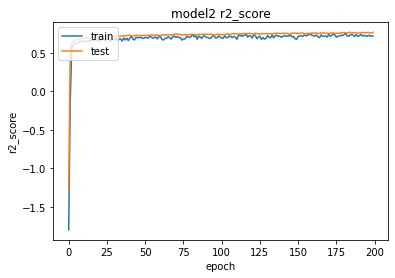

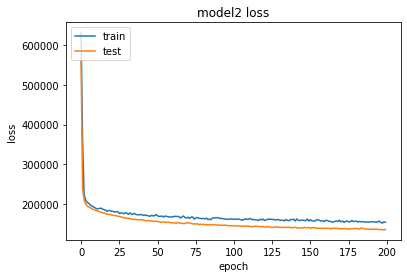

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['r_2_score'])
plt.plot(history2.history['val_r_2_score'])
plt.title('model2 r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


In [ ]:
tf.keras.backend.clear_session()
model3=Sequential()

initializer = tf.keras.initializers.HeUniform(seed=7)

model3.add(tf.keras.Input(shape=16))
#model2.add(tf.keras.layers.BatchNormalization(input_shape=(16,)))

model3.add(Dense(256,activation='relu',kernel_initializer=initializer))
model3.add(Dropout(0.20))
#model2.add(tf.keras.layers.BatchNormalization())

model3.add(Dense(128,activation='relu',kernel_initializer=initializer))
model3.add(Dropout(0.20))
#model2.add(tf.keras.layers.BatchNormalization())

model3.add(Dense(64,activation='relu',kernel_initializer=initializer))
model3.add(Dropout(0.20))
#model2.add(tf.keras.layers.BatchNormalization())

model3.add(Dense(32,activation='relu',kernel_initializer=initializer))
model3.add(Dropout(0.20))

model3.add(Dense(1,activation="linear"))

### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

In [ ]:
adam_opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model3.compile(optimizer=adam_opt,loss='mean_squared_error',metrics=[r_2_score])

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



In [ ]:
callback3=tf.keras.callbacks.EarlyStopping(mode="min",monitor="val_loss",patience=10,restore_best_weights=True)
history3=model3.fit(X_train,y_train,batch_size=64,validation_data=(X_test,y_test),epochs=200,callbacks=[callback3],verbose=1)

Epoch 1/200
93/93 [==============================] - 1s 5ms/step - loss: 1099052190436.7660 - r_2_score: -0.8851 - val_loss: 806253166592.0000 - val_r_2_score: -0.2095
Epoch 2/200
93/93 [==============================] - 0s 3ms/step - loss: 426795249576.8511 - r_2_score: 0.2584 - val_loss: 186680180736.0000 - val_r_2_score: 0.7026
Epoch 3/200
93/93 [==============================] - 0s 3ms/step - loss: 184124692087.8298 - r_2_score: 0.6178 - val_loss: 161910210560.0000 - val_r_2_score: 0.7575
Epoch 4/200
93/93 [==============================] - 0s 3ms/step - loss: 173675228225.3617 - r_2_score: 0.6382 - val_loss: 145605181440.0000 - val_r_2_score: 0.7836
Epoch 5/200
93/93 [==============================] - 0s 3ms/step - loss: 179908754758.8085 - r_2_score: 0.6957 - val_loss: 136305451008.0000 - val_r_2_score: 0.8020
Epoch 6/200
93/93 [==============================] - 0s 3ms/step - loss: 145362708872.1702 - r_2_score: 0.7174 - val_loss: 122770096128.0000 - val_r_2_score: 0.8160
Epoch 7

### Check the R2 score on complete test data

In [ ]:
y_pred=model3.predict(X_test)
r2_score(y_test,y_pred)

0.9580997416263386

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

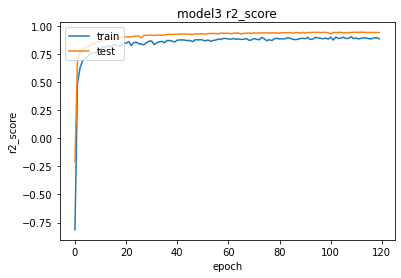

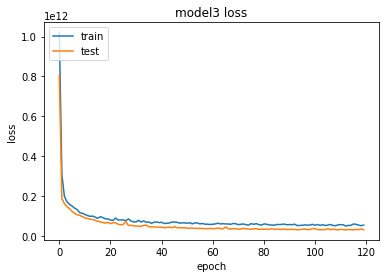

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history3.history['r_2_score'])
plt.plot(history3.history['val_r_2_score'])
plt.title('model3 r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()